## Finding a correlation between the achievements in the Olympic Games (number of medals) and the GDP per capita by country

Hello my name is May Rozental (id:307929430), young computer science student who passionate about data science.


# Introduction

The topic of the final project will deal with the connection between success / failure in the Olympic Games of the representative team and the economic strength of its country, which will be measured by its GDP per capita.

As is well known, the Olympic Games are the largest sporting event in the world since 1896, which takes place every 4 years with the largest number of competitors in 26 different sports.
Because of the size of the class and the scope of the competition, the Olympic medals are considered the most prestigious and their winners are considered the best in the world, and since the coverage around the games is global, it is important for each country to have adequate representation in the competition.

In this project I will perform various data analyzes related to the competition and with the help of machine learning I will check if there is a direct connection between the success / failure of a team and the economic situation of the country from which the team comes.
That is, do the contestants who come from stronger countries have a better chance of winning the games?

# Motivation and Purposes

Analyzing the data of the Olympic Games can be a significant and strategic tool in understanding the chances of success of any team.
Based on the long history of the Games, a model can be built for each sport in terms of age, height and weight of contestants with a greater chance of success and in addition measure the chance of success given the country's investment in the Olympic team (since we rely on GDP data richer countries More also in sports).

For this purpose, there are quite a few difficulties, such as missing appropriate data for analysis and difficulties in switching between many different types of data.

In order to overcome the obstacles I will try to explore additional options that may give help.

for example:
1) Calculation of the winning ratio for the team according to the total number of contestants in it. 
That is, on average by years what is the total winning percentage.

2) Calculation of the total amount of medals for each country.

3) State rating by GDP.

4) Building a model of a contestant by age, height and weight for the chances of success for each sport.

# Personal Code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import sklearn as skl

Lets read the data and get info for him

In [2]:
gdp=pd.read_csv('/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/dictionary.csv')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


Now we should clean and adjust the data. 

In [3]:
gdp.head(10)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
5,Angola,ANG,25021974.0,4101.472152
6,Antigua and Barbuda,ANT,91818.0,13714.731962
7,Argentina,ARG,43416755.0,13431.878340
8,Armenia,ARM,3017712.0,3489.127690
9,Aruba*,ARU,103889.0,NaN


We will lower the rows where there is no value and also sort the table according to GDP so that the rich countries will be at the top of the table.
It is important to note that the download of the states will not affect because without representation most often in games.

In [4]:
gdp.dropna(inplace=True)
gdp.rename(columns={'Code':'NOC'},inplace=True)
gdp.sort_values('GDP per Capita',ascending=False)

,Country,NOC,Population,GDP per Capita
108,Luxembourg,LUX,569676.0,101449.968168
175,Switzerland,SUI,8286976.0,80945.079219
135,Norway,NOR,5195921.0,74400.369777
148,Qatar,QAT,2235355.0,73653.394435
88,Ireland,IRL,4640703.0,61133.672427
...,...,...,...,...
110,Madagascar,MAD,24235390.0,401.836006
111,Malawi,MAW,17215232.0,371.985748
133,Niger,NIG,19899120.0,358.958152
37,Central African Republic,CAF,4900274.0,323.201674


In [5]:
athlete=pd.read_csv('/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/athlete_events.csv')
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#We will remove irrelevant columns
athlete.drop(columns=['Sex','Games','Season','City','Event'],inplace=True)
athlete.sort_values('Year',ascending=False)

,ID,Name,Age,Height,Weight,Team,NOC,Year,Sport,Medal
198703,99780,Maximilian Reinelt,27.0,195.0,98.0,Germany,GER,2016,Rowing,Silver
90507,45859,Sophie Elizabeth Hansson,18.0,186.0,74.0,Sweden,SWE,2016,Swimming,NaN
111165,56244,Arsen Julfalakyan,29.0,166.0,76.0,Armenia,ARM,2016,Wrestling,NaN
82309,41810,Lalonde Keida Gordon,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016,Athletics,NaN
82308,41810,Lalonde Keida Gordon,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016,Athletics,NaN
...,...,...,...,...,...,...,...,...,...,...
115559,58546,Gyula Kellner,24.0,NaN,NaN,Hungary,HUN,1896,Athletics,Bronze
97183,49185,Fritz Hofmann,24.0,167.0,56.0,Germany,GER,1896,Athletics,NaN
258338,129362,"Desiderius ""Dezs"" Wein (Boros)",23.0,NaN,NaN,Hungary,HUN,1896,Gymnastics,NaN
258339,129362,"Desiderius ""Dezs"" Wein (Boros)",23.0,NaN,NaN,Hungary,HUN,1896,Gymnastics,NaN


let's merge the datasets

In [7]:
merged=pd.merge(athlete,gdp,on='NOC',how='left')
merged.head(10)

,ID,Name,Age,Height,Weight,Team,NOC,Year,Sport,Medal,Country,Population,GDP per Capita
0,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992,Basketball,NaN,China,1.371220e+09,8027.683810
1,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012,Judo,NaN,China,1.371220e+09,8027.683810
2,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,Denmark,DEN,1920,Football,NaN,Denmark,5.676002e+06,51989.293471
3,4,Edgar Lindenau Aabye,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Tug-Of-War,Gold,Denmark,5.676002e+06,51989.293471
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,Netherlands,NED,1992,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085
7,5,Christine Jacoba Aaftink,25.0,185.0,82.0,Netherlands,NED,1992,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085
8,5,Christine Jacoba Aaftink,27.0,185.0,82.0,Netherlands,NED,1994,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085
9,5,Christine Jacoba Aaftink,27.0,185.0,82.0,Netherlands,NED,1994,Speed Skating,NaN,Netherlands,1.693652e+07,44299.768085


We can compare the columns of a team and a country and see that there is indeed a match between the sets. but we dont need both them then we will remove the team column. 

In [8]:
merged.drop(columns=['Team'],inplace=True)
merged.dropna(inplace=True)
merged.sort_values('GDP per Capita',ascending=False)

,ID,Name,Age,Height,Weight,NOC,Year,Sport,Medal,Country,Population,GDP per Capita
79837,40534,Marc Girardelli,28.0,178.0,82.0,LUX,1992,Alpine Skiing,Silver,Luxembourg,569676.0,101449.968168
79838,40534,Marc Girardelli,28.0,178.0,82.0,LUX,1992,Alpine Skiing,Silver,Luxembourg,569676.0,101449.968168
15317,8267,"Josef Henri ""Josy"" Barthel",25.0,173.0,68.0,LUX,1952,Athletics,Gold,Luxembourg,569676.0,101449.968168
199416,100146,Fabienne Reuteler,22.0,168.0,58.0,SUI,2002,Snowboarding,Bronze,Switzerland,8286976.0,80945.079219
86658,43949,Werner Gnthr,27.0,200.0,128.0,SUI,1988,Athletics,Bronze,Switzerland,8286976.0,80945.079219
...,...,...,...,...,...,...,...,...,...,...,...,...
166765,83769,Maria de Lurdes Mutola,27.0,165.0,63.0,MOZ,2000,Athletics,Gold,Mozambique,27977863.0,529.242556
166764,83769,Maria de Lurdes Mutola,23.0,165.0,63.0,MOZ,1996,Athletics,Bronze,Mozambique,27977863.0,529.242556
4589,2610,Abdoul Razak Issoufou Alfaga,21.0,207.0,90.0,NIG,2016,Taekwondo,Silver,Niger,19899120.0,358.958152
172356,86595,Francine Niyonsaba,23.0,166.0,60.0,BDI,2016,Athletics,Silver,Burundi,11178921.0,277.068309


# Now we check medals per country

In [9]:
goldMedals=merged[merged.Medal == 'Gold']
goldMedals.head(10)

,ID,Name,Age,Height,Weight,NOC,Year,Sport,Medal,Country,Population,GDP per Capita
42,17,Paavo Johannes Aaltonen,28.0,175.0,64.0,FIN,1948,Gymnastics,Gold,Finland,5482013.0,42311.036231
44,17,Paavo Johannes Aaltonen,28.0,175.0,64.0,FIN,1948,Gymnastics,Gold,Finland,5482013.0,42311.036231
48,17,Paavo Johannes Aaltonen,28.0,175.0,64.0,FIN,1948,Gymnastics,Gold,Finland,5482013.0,42311.036231
60,20,Kjetil Andr Aamodt,20.0,176.0,85.0,NOR,1992,Alpine Skiing,Gold,Norway,5195921.0,74400.369777
73,20,Kjetil Andr Aamodt,30.0,176.0,85.0,NOR,2002,Alpine Skiing,Gold,Norway,5195921.0,74400.369777
76,20,Kjetil Andr Aamodt,30.0,176.0,85.0,NOR,2002,Alpine Skiing,Gold,Norway,5195921.0,74400.369777
78,20,Kjetil Andr Aamodt,34.0,176.0,85.0,NOR,2006,Alpine Skiing,Gold,Norway,5195921.0,74400.369777
172,72,Aleksey Aleksandrovich Abalmasov,28.0,180.0,83.0,BLR,2008,Canoeing,Gold,Belarus,9513000.0,5740.456495
173,73,Luc Abalo,23.0,182.0,86.0,FRA,2008,Handball,Gold,France,66808385.0,36205.568102
174,73,Luc Abalo,27.0,182.0,86.0,FRA,2012,Handball,Gold,France,66808385.0,36205.568102


In [10]:
goldMedals.Country.value_counts().reset_index(name='Count').head(10)

,index,Count
0,United States,2115
1,Germany,547
2,Russia,379
3,Canada,362
4,China,350
5,United Kingdom,330
6,Australia,319
7,Italy,315
8,Hungary,289
9,France,285


Text(0.5, 1.0, 'Medals per Country')

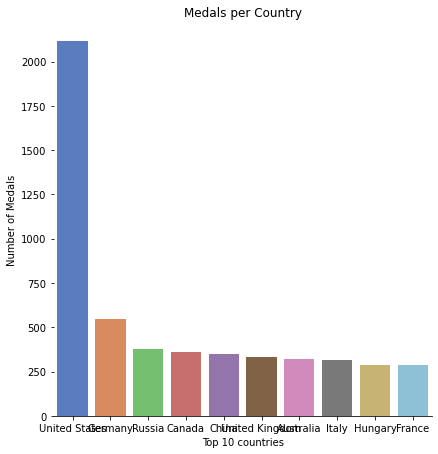

In [11]:
totalGoldMedals = goldMedals.Country.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

From the graph we understand unequivocally who are the countries with the most medals.
We will compare using linear regression and examine whether there is a direct relationship between this rating and the GDP rating of each country.

# We will examine a linear regression between GDP and the countries with the most gold medals

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-12-edff31c726be>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  goldMedals.Country,gdp.GDPperCapita,coef=datasets.make_regression(n_samples=7972,n_features=1,n_targets=1,n_informative=1,noise=15,coef=True)


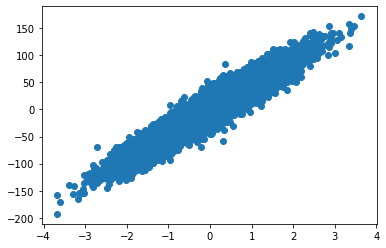

In [12]:
from sklearn import linear_model,datasets
goldMedals.Country,gdp.GDPperCapita,coef=datasets.make_regression(n_samples=7972,n_features=1,n_targets=1,n_informative=1,noise=15,coef=True)
plt.plot(goldMedals.Country,gdp.GDPperCapita,'o')

# Summary and conclusions for project planning

So far I have performed a preliminary collection and analysis of the data,
Because the data is very broad, different types of surgeries can be performed on it.
In my opinion, at this stage the attempt to make a linear regression between the leading achievement countries and the GDP came out unequivocally.
Undoubtedly, it is necessary to perform further tests by additional algorithms later on in order to reach an unequivocal extension between the achievements in the Olympic Games (number of medals) and the per capita GDP.